In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy as sp
from scipy import stats
import scipy.stats.mstats as mst
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('991_CleanedData.csv', low_memory=False)

#Table of Contents#

**1. Significance across CVD risk - nominal/ordinal**
- Racial group
- Discrimination category
- History of CVD
- Education
- Income

**2. Significance across CVD risk - continuous**
- Discrimination score
- CRP
- Perceived Stress

#1. Significance Across CVD Risk - Categorical/Ordinal#

Unadjusted analysis - testing for significance against excess vascular age (continuous variable) vs the following categorical/ordinal variables:

- Race (nominal)
- Discrimination category (nominal)
- History of CVD (nominal)
- Education (all categories) (nominal/ordinal)
- Income (all categories) (nominal/ordinal)

Using Kruskal-Wallis since CVDRISK0 does not follow normal distribution and no suitable transformation found

In [3]:
y = 'CVDRISK0'

###Racial Category###

In [4]:
data.groupby('RACE').CVDRISK0.describe()

RACE            
Asian      count     529.000000
           mean        3.145587
           std         2.439812
           min         0.734670
           25%         1.687459
           50%         2.531205
           75%         3.821426
           max        24.634701
Black      count     922.000000
           mean        5.971212
           std         5.425291
           min         0.912784
           25%         2.782428
           50%         4.165402
           75%         7.327633
           max        51.949516
Caucasian  count    1529.000000
           mean        4.169980
           std         3.342758
           min         0.571169
           25%         2.154841
           50%         3.131266
           75%         4.981429
           max        29.985284
Hispanic   count     282.000000
           mean        5.150897
           std         3.516837
           min         1.296233
           25%         3.081785
           50%         4.142819
           75%         

In [5]:
black = data[data.RACE == 'Black']
asian = data[data.RACE == 'Asian']
white = data[data.RACE == 'Caucasian']
hispanic = data[data.RACE == 'Hispanic']

mst.kruskalwallis(black[y], asian[y], white[y], hispanic[y])

KruskalResult(statistic=269.13239236827604, pvalue=4.7552283673259367e-58)

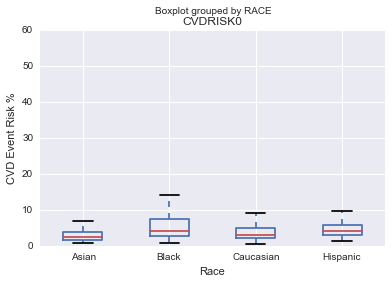

In [6]:
data.boxplot(column="CVDRISK0", by = "RACE")
plt.xlabel('Race')
plt.ylabel('CVD Event Risk %')

###Discrimination Category###

In [7]:
data.groupby('DISC_CAT0').CVDRISK0.describe()

DISC_CAT0       
HIGH       count    1646.000000
           mean        4.815433
           std         4.304309
           min         0.746421
           25%         2.323579
           50%         3.501714
           75%         5.672895
           max        50.946041
LOW        count    1616.000000
           mean        4.376065
           std         3.805431
           min         0.571169
           25%         2.213611
           50%         3.252371
           75%         5.121399
           max        51.949516
dtype: float64

In [8]:
high = data[data.DISC_CAT0 == 'HIGH']
low = data[data.DISC_CAT0 == 'LOW']

mst.kruskalwallis(high[y], low[y])

KruskalResult(statistic=10.017780721556862, pvalue=0.0015503616527577078)

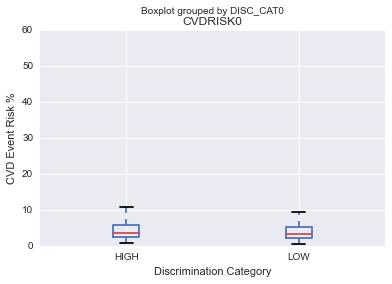

In [9]:
data.boxplot(column="CVDRISK0", by = "DISC_CAT0")
plt.xlabel('Discrimination Category')
plt.ylabel('CVD Event Risk %')

###History of CVD###

In [10]:
data.groupby('CVD').CVDRISK0.describe()

CVD       
0    count    3171.000000
     mean        4.499199
     std         3.947064
     min         0.571169
     25%         2.237897
     50%         3.333283
     75%         5.307126
     max        51.949516
1    count      91.000000
     mean        8.032577
     std         6.263586
     min         1.200616
     25%         3.593174
     50%         5.923485
     75%         9.668918
     max        26.745426
dtype: float64

In [11]:
y_cvd = data[data.CVD == 1]
n_cvd = data[data.CVD == 0]

mst.kruskalwallis(y_cvd[y], n_cvd[y])

KruskalResult(statistic=47.9661029183195, pvalue=4.3365186020563869e-12)

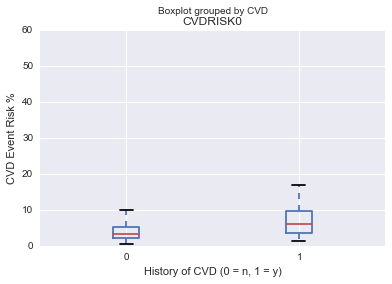

In [12]:
data.boxplot(column="CVDRISK0", by = "CVD")
plt.xlabel('History of CVD (0 = n, 1 = y)')
plt.ylabel('CVD Event Risk %')

###Education###

In [13]:
data.groupby('DEGREE').CVDRISK0.describe()

DEGREE       
1       count     235.000000
        mean        5.320561
        std         4.176685
        min         1.011225
        25%         2.736548
        50%         4.111775
        75%         6.168436
        max        29.985284
2       count     572.000000
        mean        5.274806
        std         4.173495
        min         0.940486
        25%         2.665296
        50%         3.844413
        75%         6.640489
        max        25.300151
3       count    1069.000000
        mean        5.049870
        std         4.817657
        min         0.689198
        25%         2.369885
        50%         3.534507
        75%         6.092229
        max        51.949516
4       count     651.000000
        mean        3.734395
        std         3.036535
        min         0.571169
        25%         1.998487
        50%         2.995541
        75%         4.395253
        max        38.967546
5       count     735.000000
        mean        3.946940


In [14]:
edu1 = data[data.DEGREE == 1]
edu2 = data[data.DEGREE == 2]
edu3 = data[data.DEGREE == 3]
edu4 = data[data.DEGREE == 4]
edu5 = data[data.DEGREE == 5]

mst.kruskalwallis(edu1[y], edu2[y], edu3[y], edu4[y], edu5[y])

KruskalResult(statistic=117.8203187579669, pvalue=1.5600672811485369e-24)

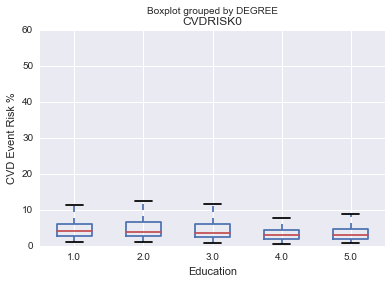

In [15]:
data.boxplot(column="CVDRISK0", by = "DEGREE")
plt.xlabel('Education')
plt.ylabel('CVD Event Risk %')

###Income###

In [16]:
inc1 = data[data.INCOME0 == 1]
inc2 = data[data.INCOME0 == 2]
inc3 = data[data.INCOME0 == 3]
inc4 = data[data.INCOME0 == 4]

mst.kruskalwallis(inc1[y], inc2[y], inc3[y], inc4[y])

KruskalResult(statistic=100.60252814613786, pvalue=1.1532870796122062e-21)

In [17]:
data.groupby('INCOME0').CVDRISK0.describe()

INCOME0       
1        count     483.000000
         mean        5.910653
         std         5.083502
         min         0.800346
         25%         2.842877
         50%         4.342884
         75%         6.910685
         max        50.946041
2        count    1077.000000
         mean        4.689912
         std         4.212727
         min         0.571169
         25%         2.352565
         50%         3.373360
         75%         5.517887
         max        51.949516
3        count    1240.000000
         mean        4.323844
         std         3.718894
         min         0.734670
         25%         2.117755
         50%         3.277837
         75%         5.073736
         max        38.967546
4        count     462.000000
         mean        3.745622
         std         2.969220
         min         0.746421
         25%         1.926827
         50%         2.973506
         75%         4.432883
         max        25.535528
dtype: float64

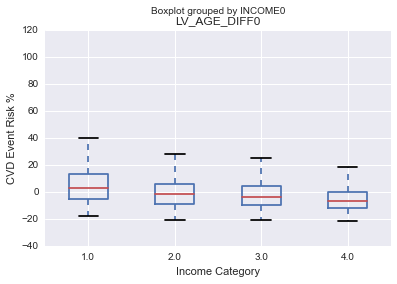

In [18]:
data.boxplot(column="LV_AGE_DIFF0", by = "INCOME0")
plt.xlabel('Income Category')
plt.ylabel('CVD Event Risk %')

#2. Significance Across CVD Risk - Continuous#

Using Spearman's correlation to look at unadjusted correlation coefficients for the following continuous variables:

- Discrimination score
- CRP
- Perceived Stress


###Discrimination Score###

In [19]:
sp.stats.spearmanr(data.DISC_SCORE0, data[y])

SpearmanrResult(correlation=0.051851745368749522, pvalue=0.0030533602145825928)

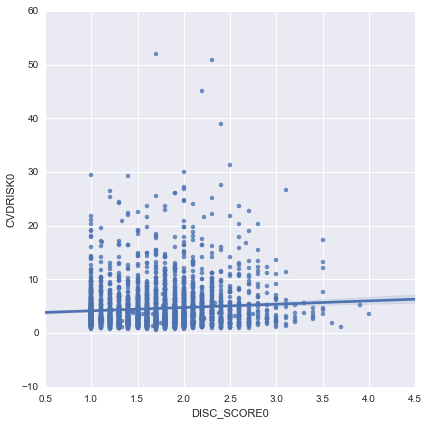

In [20]:
sns.pairplot(data, x_vars='DISC_SCORE0', y_vars='CVDRISK0', size=6, kind='reg')

###C-Reactive Protein###

In [21]:
sp.stats.spearmanr(data.CRPRESU0, data[y])

SpearmanrResult(correlation=0.37845416232465851, pvalue=1.3716493590306859e-111)

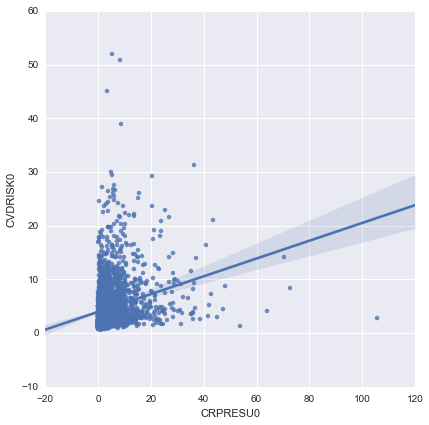

In [22]:
sns.pairplot(data, x_vars='CRPRESU0', y_vars='CVDRISK0', size=6, kind='reg')

###Perceived Stress###

In [23]:
sp.stats.spearmanr(data.MOD_PSTRESS, data[y])

SpearmanrResult(correlation=0.063830373565808715, pvalue=0.00026436584617759167)

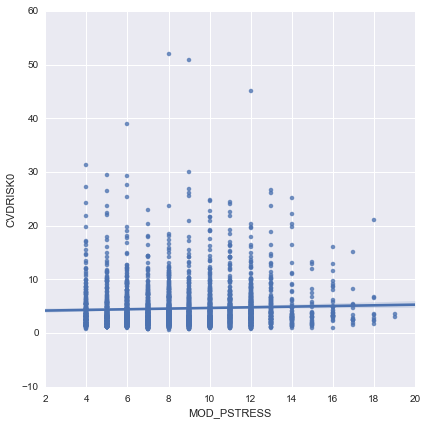

In [24]:
sns.pairplot(data, x_vars='MOD_PSTRESS', y_vars='CVDRISK0', size=6, kind='reg')

###Age###

In [25]:
sp.stats.spearmanr(data.AGE0, data[y])

SpearmanrResult(correlation=0.3206857656184251, pvalue=6.5540525771416822e-79)

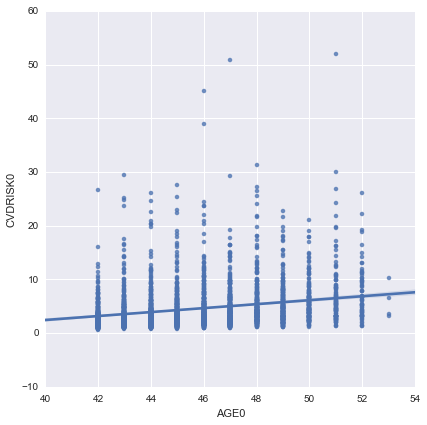

In [26]:
sns.pairplot(data, x_vars='AGE0', y_vars='CVDRISK0', size=6, kind='reg')

###BMI###

In [27]:
sp.stats.spearmanr(data.BMI0, data[y])

SpearmanrResult(correlation=0.44730754327169647, pvalue=2.8607019509048787e-160)

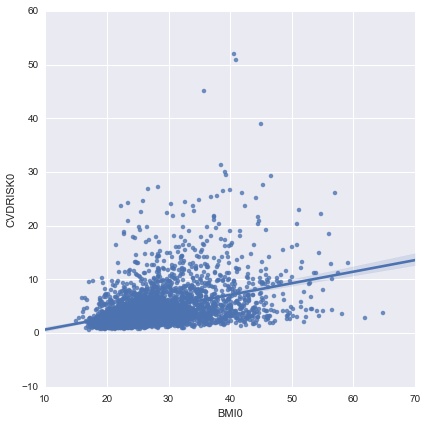

In [28]:
sns.pairplot(data, x_vars='BMI0', y_vars='CVDRISK0', size=6, kind='reg')